PROJETO Airbnb Rio - Ferramenta de Previsão de Imóvel para pessoas comuns



In [2]:
import pandas as pd
import pathlib #Identifica uma pasta e percorre todos os arquivos
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
import plotly.io as pio
pio.renderers.default = 'notebook'

In [3]:
meses = {"jan": 1,"fev": 2,"mar": 3,"abr": 4,"mai": 5,"jun": 6,"jul": 7,"ago": 8,"set": 9,"out": 10,"nov": 11,"dez": 12}

caminho_bases = pathlib.Path('dataset')
dataframes = []  # Lista para armazenar os DataFrames

for arquivo in caminho_bases.iterdir():  # Itera pelos arquivos na pasta
    nome_mes = arquivo.name[:3] #Pega as primeiras 3 letras do mês
    mes = meses[nome_mes]   #Pega o nome do mês

    ano = arquivo.name[-8:] #Pega as 8 ultimas letras do arquivo
    ano = int(ano.replace('.csv', '')) #Tira o .csv para deixar apenas o ano do arquivo

    df = pd.read_csv(caminho_bases / arquivo.name)
    df['ano'] = ano #Adiciona a coluna de ano
    df['mes'] = mes #Adiciona a coluna de mês
    dataframes.append(df)  # Adiciona cada DataFrame à lista

# Concatena todos os DataFrames em um único
base_airbnb = pd.concat(dataframes, ignore_index=True)

# Exibe o resultado
display(base_airbnb)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\3704969305.py:13: DtypeWarning:

Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\3704969305.py:13: DtypeWarning:

Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\3704969305.py:13: DtypeWarning:

Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\3704969305.py:13: DtypeWarning:

Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\3704969305.py:13: DtypeWarning:

Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\3704969305.py:13: DtypeWarning:

Columns (87) have mixed types

id                            listing_url       scrape_id  \
0          14063     https://www.airbnb.com/rooms/14063  20180414160018   
1          17878     https://www.airbnb.com/rooms/17878  20180414160018   
2          24480     https://www.airbnb.com/rooms/24480  20180414160018   
3          25026     https://www.airbnb.com/rooms/25026  20180414160018   
4          31560     https://www.airbnb.com/rooms/31560  20180414160018   
...          ...                                    ...             ...   
902205  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
902206  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
902207  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
902208  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
902209  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

       last_scraped                                          name  \
0        2018-04-14                          Living in a Postcard   
1        2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2        2018-04-14              Nice and cozy near Ipanema Beach   
3        2018-04-14     Beautiful Modern Decorated Studio in Copa   
4        2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...             ...                                           ...   
902205   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
902206   2019-09-24                      Alugo para o Rock in Rio   
902207   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
902208   2019-09-24                     Cobertura Cinematografica   
902209   2019-09-24     Quarto em cobertura em frente à praia III   

                                                  summary  \
0       Besides the most iconic's view, our apartment ...   
1       Please note that special rates apply for New Y...   
2       My studio is located in the best  of Ipanema. ...   
3       Our apartment is a little gem, everyone loves ...   
4       This nice and clean 1 bedroom apartment is loc...   
...                                                   ...   
902205  Em estilo contemporâneo, o Transamerica Prime ...   
902206  Confortável apartamento, 2 quartos , sendo 1 s...   
902207  Apartamento quarto e sala COMPLETO para curtas...   
902208                               Cobertura alto nivel   
902209  Quarto em cobertura quadriplex com vista lindí...   

                                                    space  \
0                                                     NaN   
1       - large balcony which looks out on pedestrian ...   
2       The studio is located at Vinicius de Moraes St...   
3       This newly renovated studio (last renovations ...   
4       This nice and clean 1 bedroom apartment is loc...   
...                                                   ...   
902205                                                NaN   
902206  O apartamento estará com mobília completa disp...   
902207  Espaço ideal para até 5 pessoas. Cama de casal...   
902208                                                NaN   
902209                                                NaN   

                                              description experiences_offered  \
0       Besides the most iconic's view, our apartment ...                none   
1       Please note that special rates apply for New Y...                none   
2       My studio is located in the best  of Ipanema. ...                none   
3       Our apartment is a little gem, everyone loves ...                none   
4       This nice and clean 1 bedroom apartment is loc...                none   
...                                                   ...                 ...   
902205  Em estilo contemporâneo, o Transamerica Prime ...                none   
902206  Confortável apartamento, 2 quartos , sendo 1 s...                none   
902207  Apartamento quarto e sala COMPLETO para curtas...                none   
902208  

Criar arquivo excel com 1000 linhas para verificar todas as colunas e decidir quais remover

In [4]:
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';') #criar uma base nova com 1000 registros

Retirar colunas no excel e verificar colunas com valores sem identificação

In [5]:
print(base_airbnb[['experiences_offered']].value_counts())

experiences_offered
none                   902210
Name: count, dtype: int64


In [6]:
#Comparar duas colunas para ver se são iguais
print((base_airbnb['host_listings_count'] == base_airbnb['host_total_listings_count']).value_counts())

True     901750
False       460
Name: count, dtype: int64


Identificar as colunas a partir do excel

In [7]:
colunas = ['host_response_time','host_response_rate','host_is_superhost','host_listings_count','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','is_business_travel_ready','cancellation_policy','ano','mes'
]
base_airbnb = base_airbnb.loc[:,colunas] #Filtrar na base toda, só as colunas desejadas
display(base_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                      NaN                NaN                 f   
1           within an hour               100%                 t   
2           within an hour               100%                 f   
3           within an hour               100%                 f   
4           within an hour               100%                 t   
...                    ...                ...               ...   
902205      within an hour                93%                 f   
902206                 NaN                NaN                 f   
902207  within a few hours                74%                 f   
902208                 NaN                NaN                 f   
902209  a few days or more                38%                 f   

        host_listings_count   latitude  longitude property_type  \
0                       1.0 -22.946854 -43.182737     Apartment   
1                       2.0 -22.965919 -43.178962   Condominium   
2                       1.0 -22.985698 -43.201935     Apartment   
3                       3.0 -22.977117 -43.190454     Apartment   
4                       1.0 -22.983024 -43.214270     Apartment   
...                     ...        ...        ...           ...   
902205                  0.0 -23.003180 -43.342840     Apartment   
902206                  0.0 -22.966640 -43.393450     Apartment   
902207                 32.0 -22.962080 -43.175520     Apartment   
902208                  0.0 -23.003400 -43.341820     Apartment   
902209                  5.0 -23.010560 -43.363350     Apartment   

              room_type  accommodates  bathrooms  ...  \
0       Entire home/apt             4        1.0  ...   
1       Entire home/apt             5        1.0  ...   
2       Entire home/apt             2        1.0  ...   
3       Entire home/apt             3        1.0  ...   
4       Entire home/apt             3        1.0  ...   
...                 ...           ...        ...  ...   
902205  Entire home/apt             4        1.0  ...   
902206  Entire home/apt             4        2.0  ...   
902207  Entire home/apt             5        1.0  ...   
902208  Entire home/apt             4        1.0  ...   
902209     Private room             2        0.0  ...   

        review_scores_cleanliness  review_scores_checkin  \
0                             9.0                    9.0   
1                             9.0                   10.0   
2                            10.0                   10.0   
3                            10.0                   10.0   
4                            10.0                   10.0   
...                           ...                    ...   
902205                        NaN                    NaN   
902206                        NaN                    NaN   
902207                        NaN                    NaN   
902208                        NaN                    NaN   
902209                        NaN                    NaN   

       review_scores_communication review_scores_location review_scores_value  \
0                              9.0                    9.0                 9.0   
1                             10.0                    9.0                 9.0   
2                             10.0                   10.0                 9.0   
3                             10.0                   10.0                 9.0   
4                             10.0                   10.0                 9.0   
...                            ...                    ...                 ...   
902205                         NaN                    NaN                 NaN   
902206                         NaN                    NaN                 NaN   
902207                         NaN                    NaN                 NaN   
902208                         NaN                    NaN                 NaN   
902209                         NaN                    NaN                 NaN   

       instant_book

Tratar valores faltando

In [8]:
#retirar colunas que possuem mais de 300 mil valores nulos
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 300000:
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())


host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
ano                            0
mes                            0
dtype: int64


In [9]:
base_airbnb = base_airbnb.dropna() #Retirar linhas vazias
print(base_airbnb.shape) #Mostrar numero de linhas e colunas

(897709, 23)


Verificar tipos de dados de cada coluna

In [10]:
print(base_airbnb.dtypes)
print('-'*60)
print(base_airbnb.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

Preço e extra people estão como objetos ao invés de float, deve ser mudado

In [11]:
# Garantir que a coluna 'price' é string e lidar com valores ausentes
base_airbnb['price'] = base_airbnb['price'].fillna('').astype(str)
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '', regex=False)
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '', regex=False)

# Converter para float, lidando com valores inválidos
base_airbnb['price'] = pd.to_numeric(base_airbnb['price'], errors='coerce') #coerce tira valores invalidos

# Repetir o mesmo processo para 'extra_people'
base_airbnb['extra_people'] = base_airbnb['extra_people'].fillna('').astype(str)
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '', regex=False)
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '', regex=False)

# Converter para float, lidando com valores inválidos
base_airbnb['extra_people'] = pd.to_numeric(base_airbnb['extra_people'], errors='coerce')

# Verificar os tipos das colunas
print(base_airbnb.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float64
guests_included               int64
extra_people                float64
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


Análise de outliers

Text(0.5, 1.0, 'Correlation Matrix')

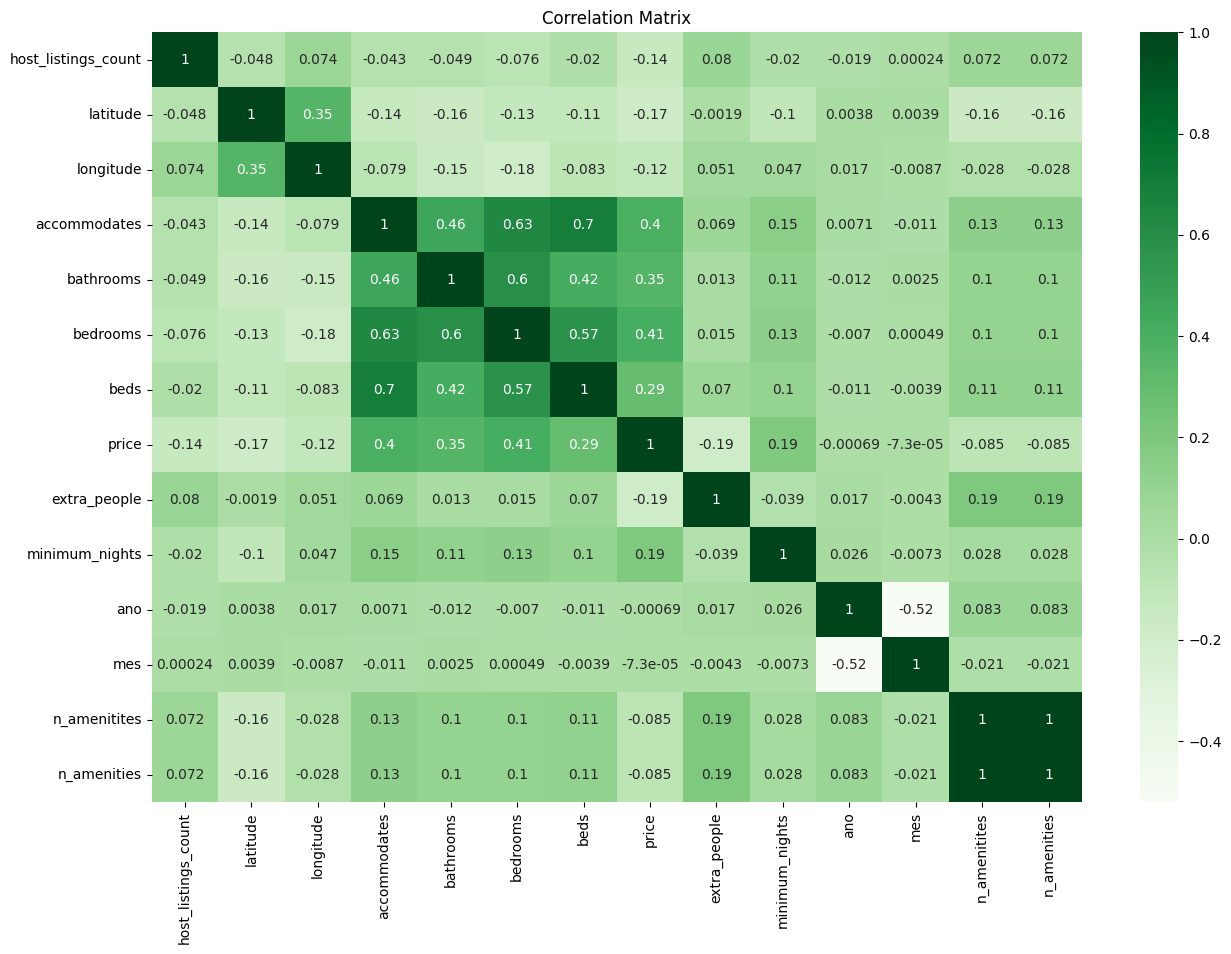

In [65]:

#print(base_airbnb.corr())
# Filtrar apenas colunas numéricas
base_airbnb_numeric = base_airbnb.select_dtypes(include=['float64', 'int64'])
# Criar o heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(base_airbnb_numeric.corr(), annot=True, cmap='Greens')
plt.title('Correlation Matrix')

Definição de funções para ajudar na análise de Outliers

In [13]:
def limites(coluna):
    q1 = coluna.quantile(0.25) #Primeiro Quartil
    q3 = coluna.quantile(0.75) #Terceiro Quartil
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna): #Função para excluir outliers e devolver sem eles e mostrar excluidos
    qtde_linhas = df.shape[0] #Calcular quantidade de linhas para saber quantas serão excluidas
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    #Estabelecer dataframe apenas com os valores entre limite inferior e superior
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [14]:
print(limites(base_airbnb['price'])) #printar os valores de q1, q3 = limite inferior e superior
base_airbnb['price'].describe() #Mostra todos os valores de media, mediana, limites, quartis

(-524.0, 1276.0)


count    897709.000000
mean        647.922333
std        1705.998135
min           0.000000
25%         151.000000
50%         297.000000
75%         601.000000
max      138288.000000
Name: price, dtype: float64

Criar função para criação de gráficos boxplot

In [15]:
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1,2) #gráfico um do lado do outros 1 linha e 2 colunas
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna)) #Definir os limites de acordo com o limite inferior e superior da coluna
    sns.boxplot(x=coluna, ax=ax2) #Decidindo qual vai aparecer na esquerda e na direita

def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.distplot(coluna, hist=True)

def grafico_barra(coluna): #Função para criar gráfico de barras com eixo x e y
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index,y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

COLUNA PRICE

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\1473809077.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




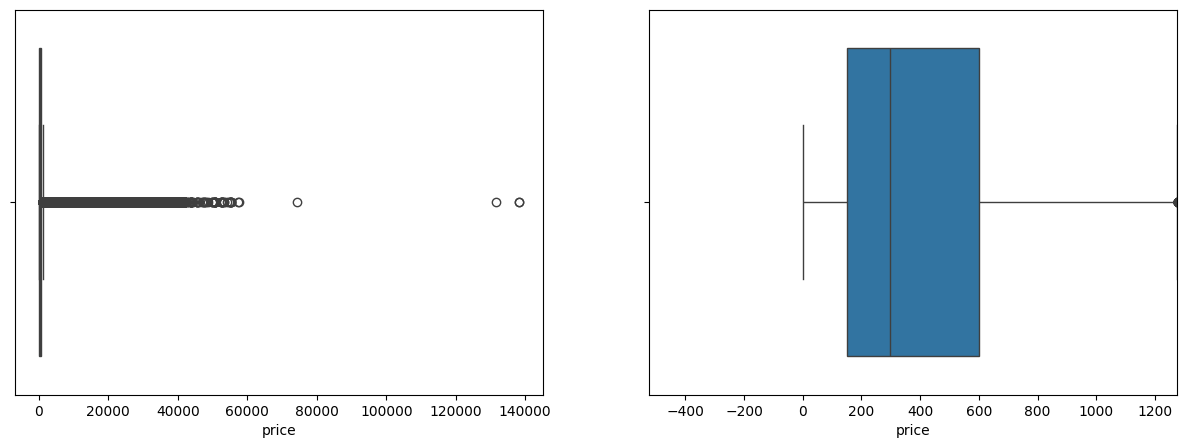

In [16]:
diagrama_caixa(base_airbnb['price'])
histograma(base_airbnb['price'])

Retirar valores acima do limite superior, pois são apartamentos de luxo e não é o objetivo da análise, portanto excluiremos os outliers

In [17]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'price')
print('{} linhas removidas'.format(linhas_removidas))

87282 linhas removidas


In [18]:
histograma(base_airbnb['price'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\1473809077.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




COLUNA EXTRA_PEOPLE

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\1473809077.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




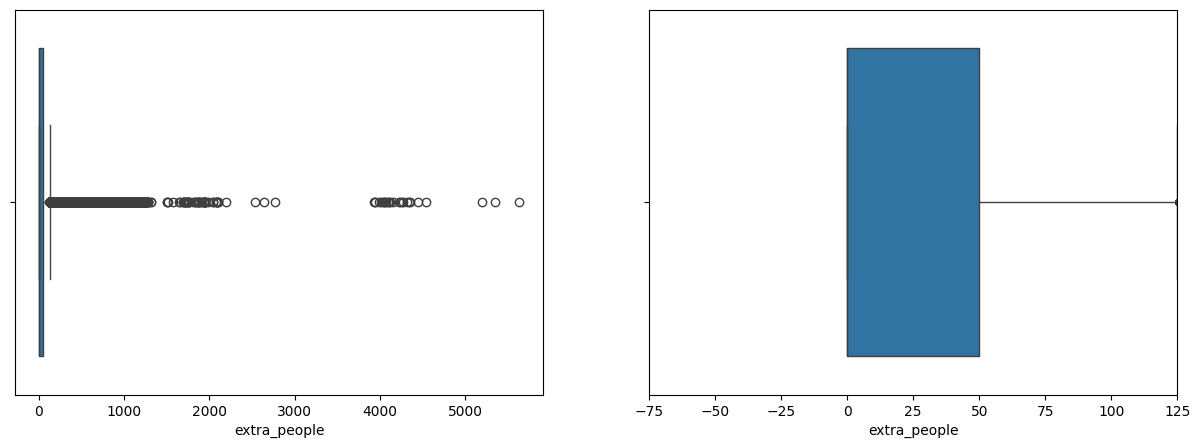

In [19]:
diagrama_caixa(base_airbnb['extra_people'])
histograma(base_airbnb['extra_people'])

In [20]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

59194 linhas removidas


host_listings_count       
accommodates                  
bathrooms                  
bedrooms                    
beds                       
guests_included              
minimum_nights                
maximum_nights                
number_of_reviews       


host_listings_count  

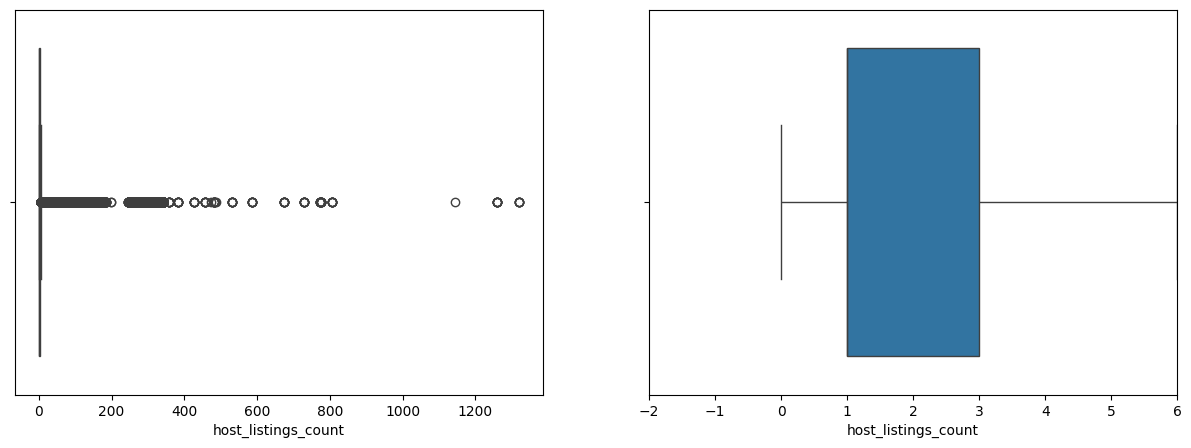

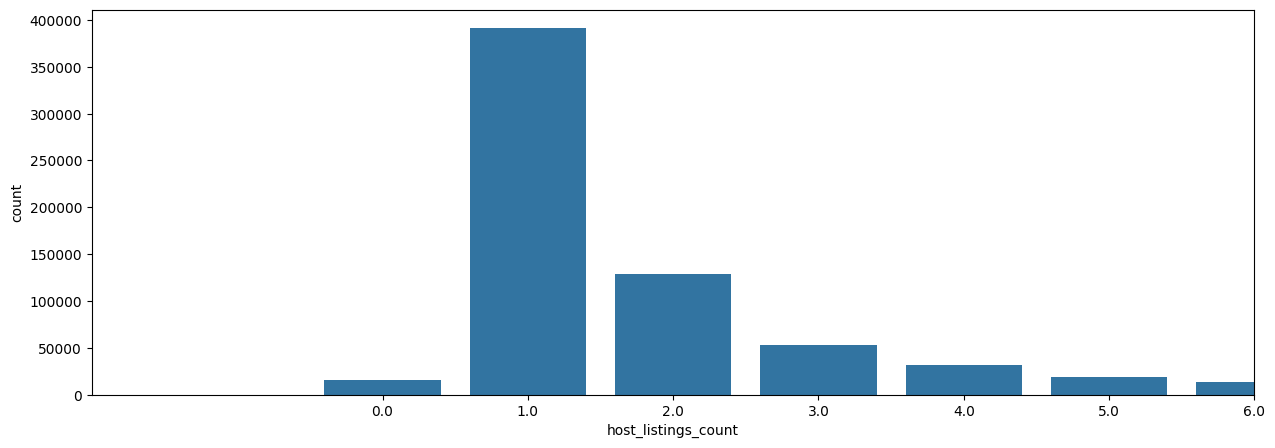

In [21]:
diagrama_caixa(base_airbnb['host_listings_count'])
grafico_barra(base_airbnb['host_listings_count'])

In [22]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'host_listings_count')
print('{} linhas removidas'.format(linhas_removidas))

97723 linhas removidas


accommodates

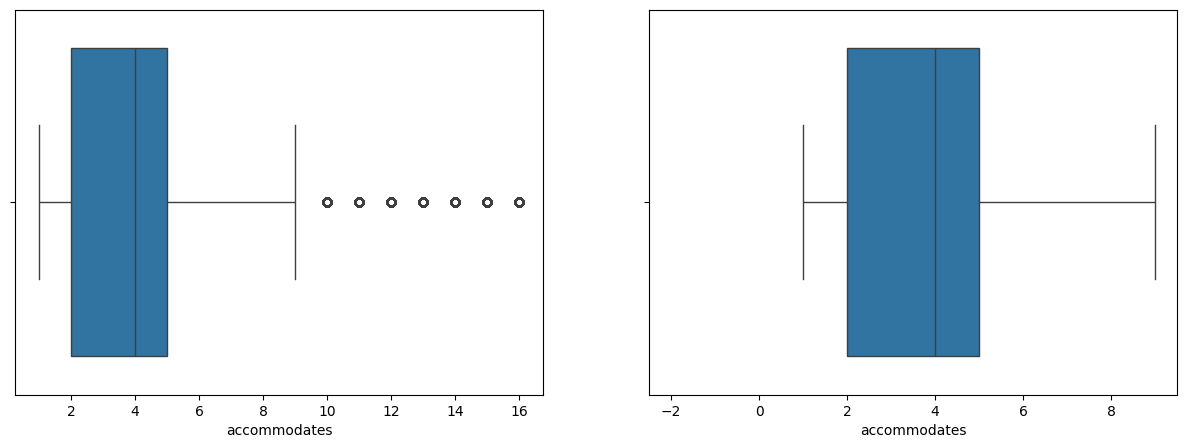

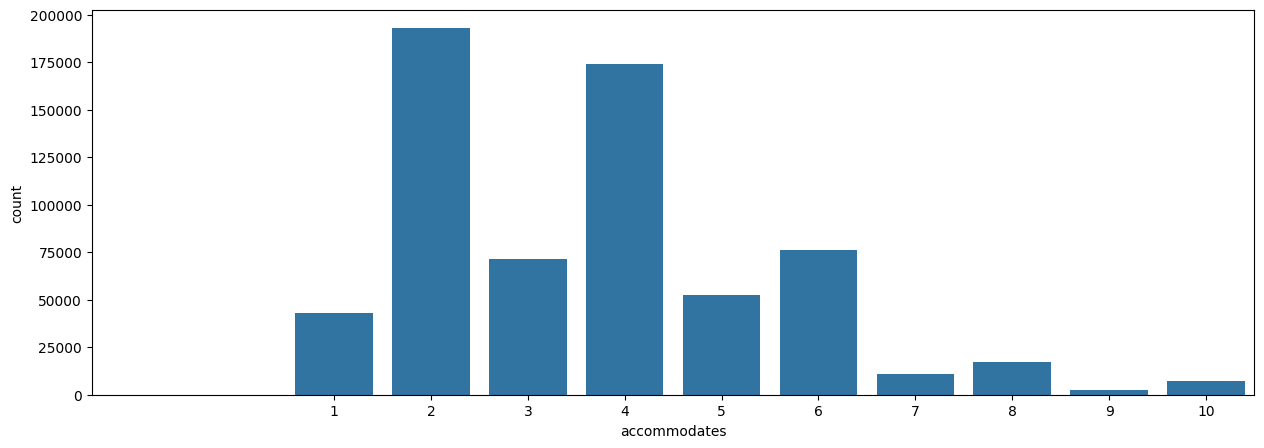

In [23]:
diagrama_caixa(base_airbnb['accommodates'])
grafico_barra(base_airbnb['accommodates'])

In [24]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

13146 linhas removidas


bathrooms

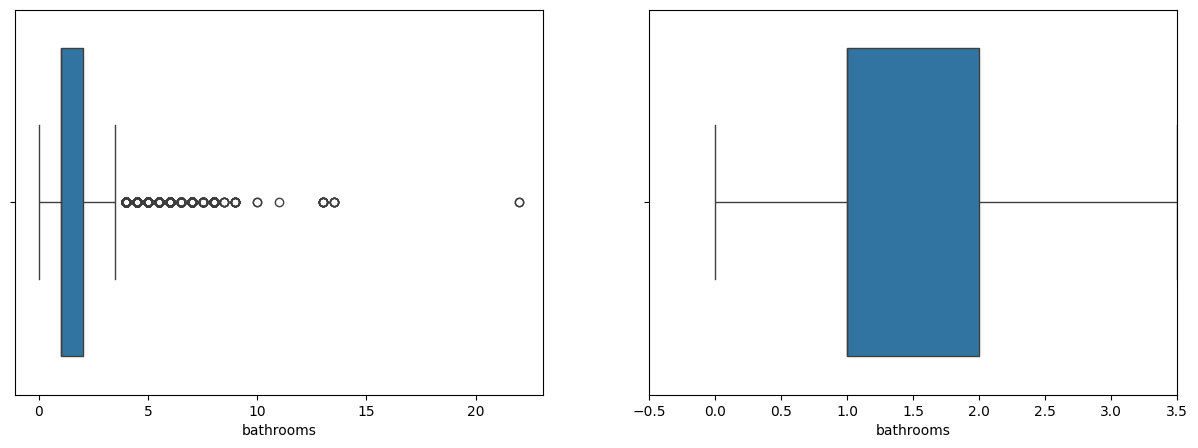

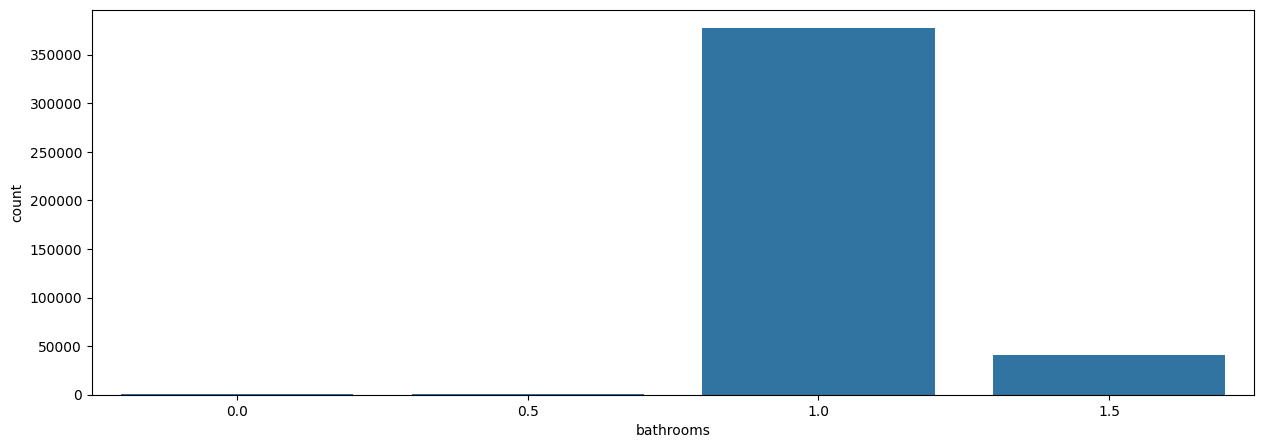

In [25]:
diagrama_caixa(base_airbnb['bathrooms'])
grafico_barra(base_airbnb['bathrooms'])

In [26]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bathrooms')
print('{} linhas removidas'.format(linhas_removidas))

6894 linhas removidas


bedrooms

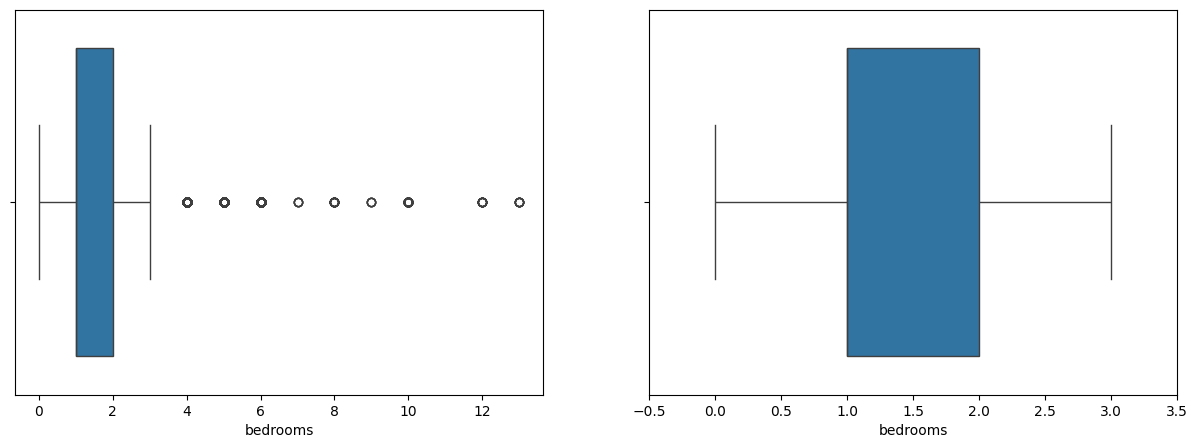

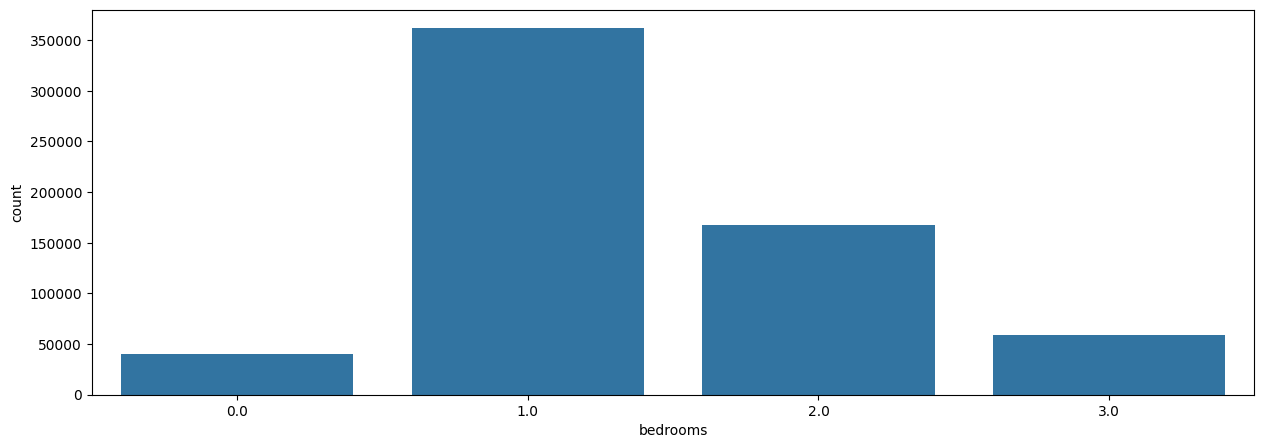

In [27]:
diagrama_caixa(base_airbnb['bedrooms'])
grafico_barra(base_airbnb['bedrooms'])

In [28]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'bedrooms')
print('{} linhas removidas'.format(linhas_removidas))

5482 linhas removidas


beds

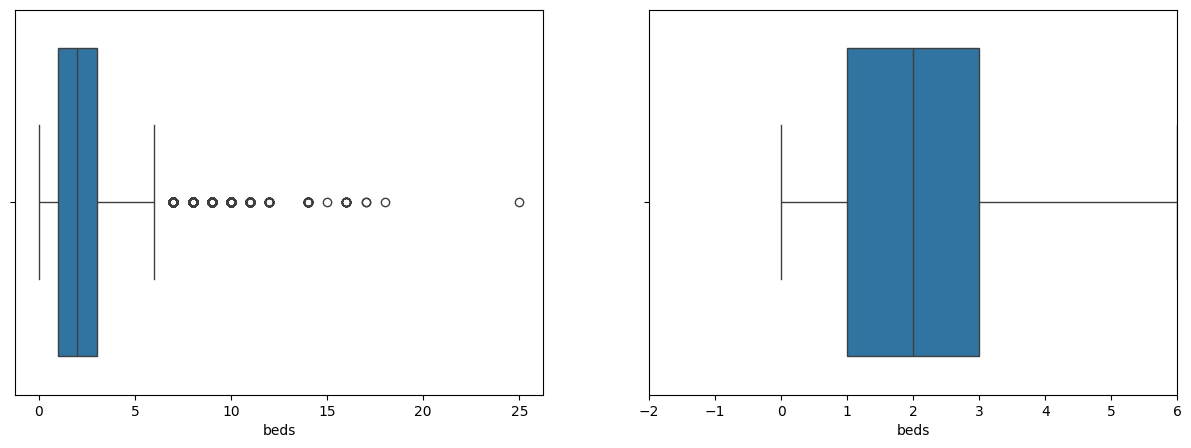

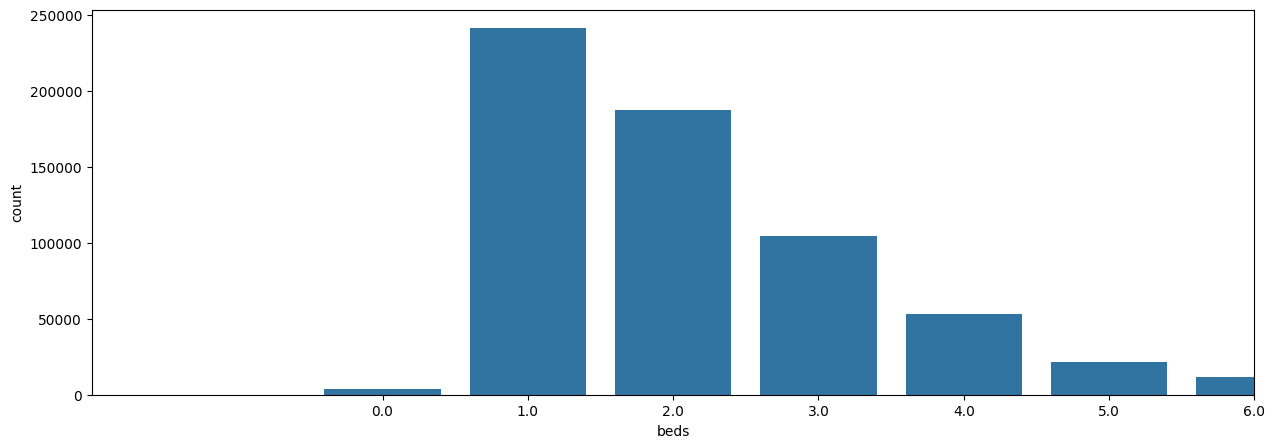

In [29]:
diagrama_caixa(base_airbnb['beds'])
grafico_barra(base_airbnb['beds'])

In [30]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'beds')
print('{} linhas removidas'.format(linhas_removidas))

5622 linhas removidas


guests_included

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\1473809077.py:5: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17904\1473809077.py:15: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



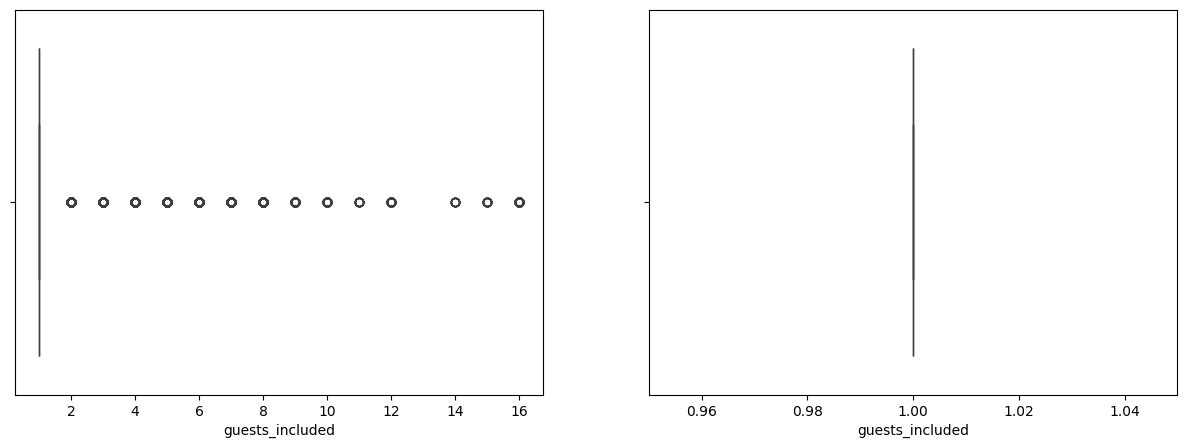

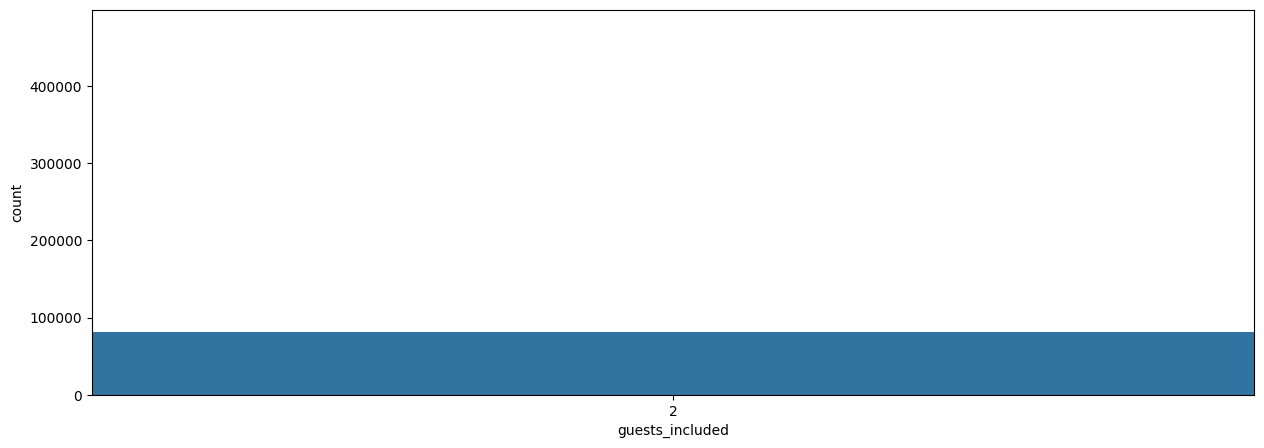

In [31]:
diagrama_caixa(base_airbnb['guests_included'])
grafico_barra(base_airbnb['guests_included'])

Remover a feature da analise. Muitos usuarios utilizam o valor do padrão como 1 e isso mostra na analise. É melhor excluir a coluna.

In [32]:
base_airbnb = base_airbnb.drop('guests_included', axis=1)

minimum_nights                
maximum_nights                
number_of_reviews   

minimum_nights 

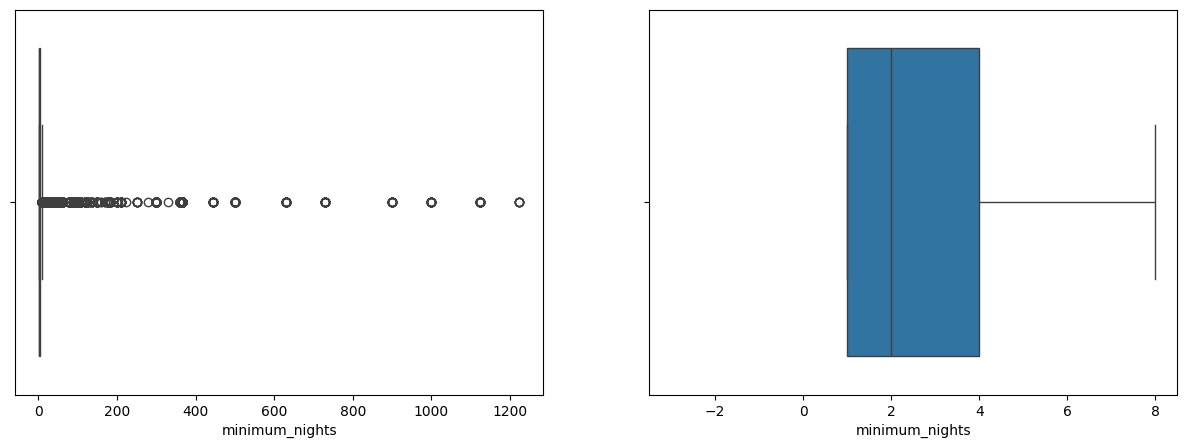

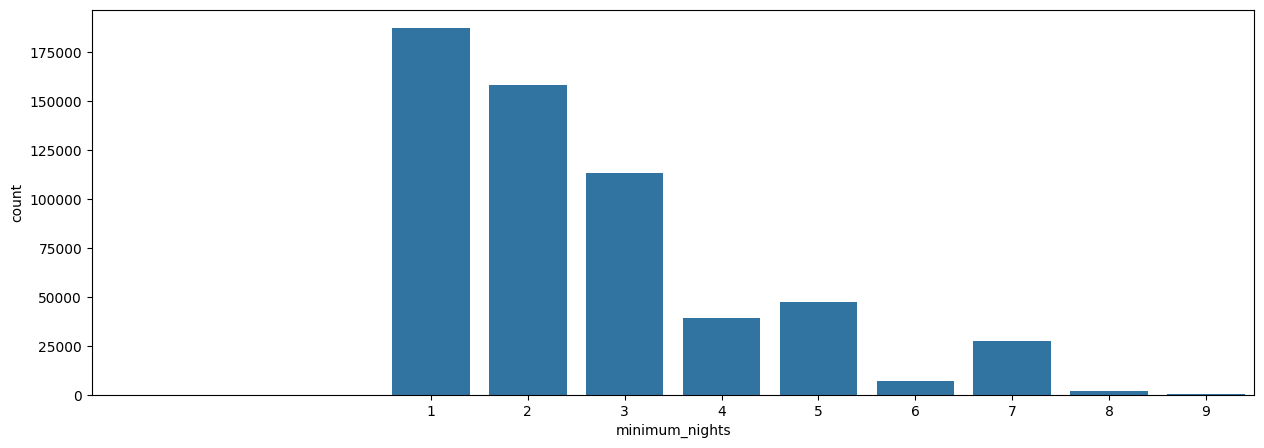

In [33]:
diagrama_caixa(base_airbnb['minimum_nights'])
grafico_barra(base_airbnb['minimum_nights'])

In [34]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'minimum_nights')
print('{} linhas removidas'.format(linhas_removidas))

40383 linhas removidas


maximum_nights  

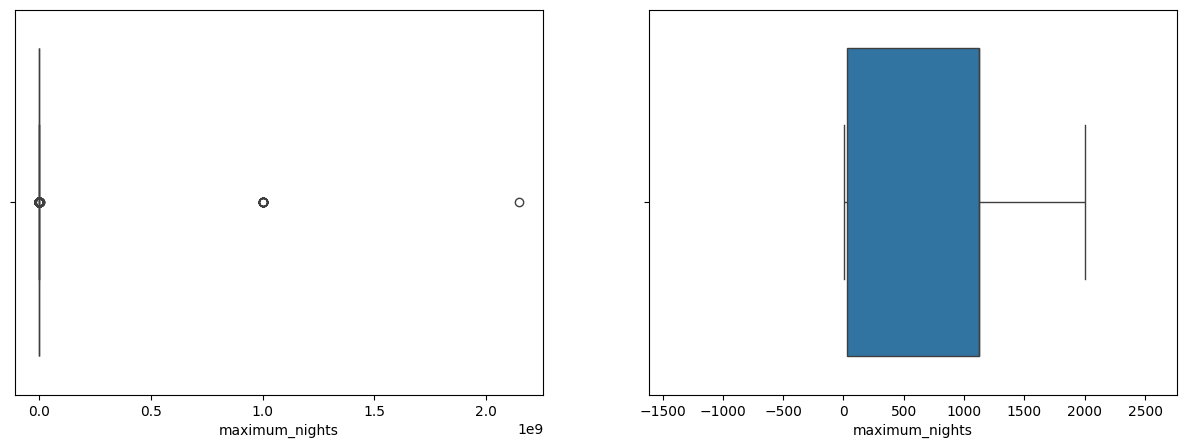

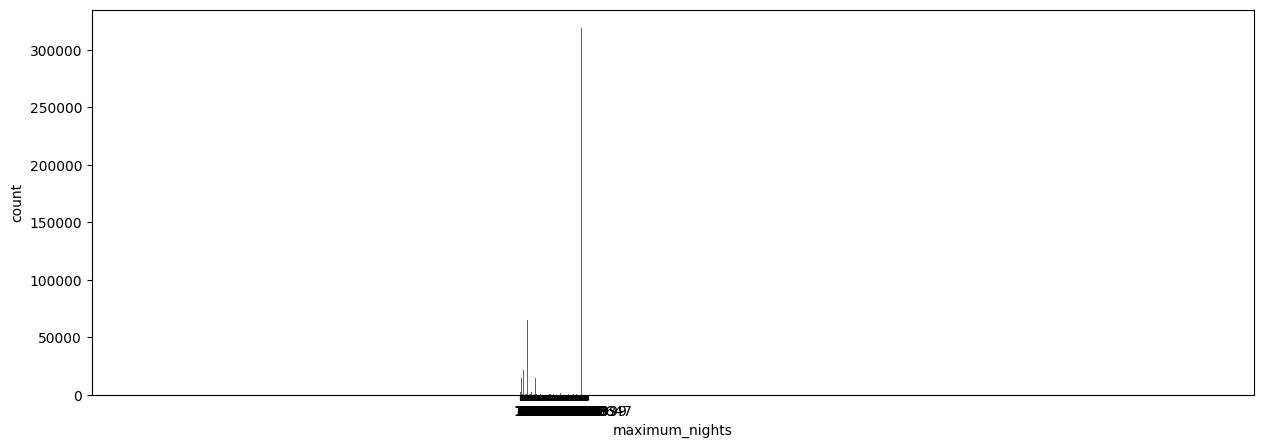

In [35]:
diagrama_caixa(base_airbnb['maximum_nights'])
grafico_barra(base_airbnb['maximum_nights'])

Retirar da analise

In [36]:
base_airbnb = base_airbnb.drop('maximum_nights', axis=1)

number_of_reviews   

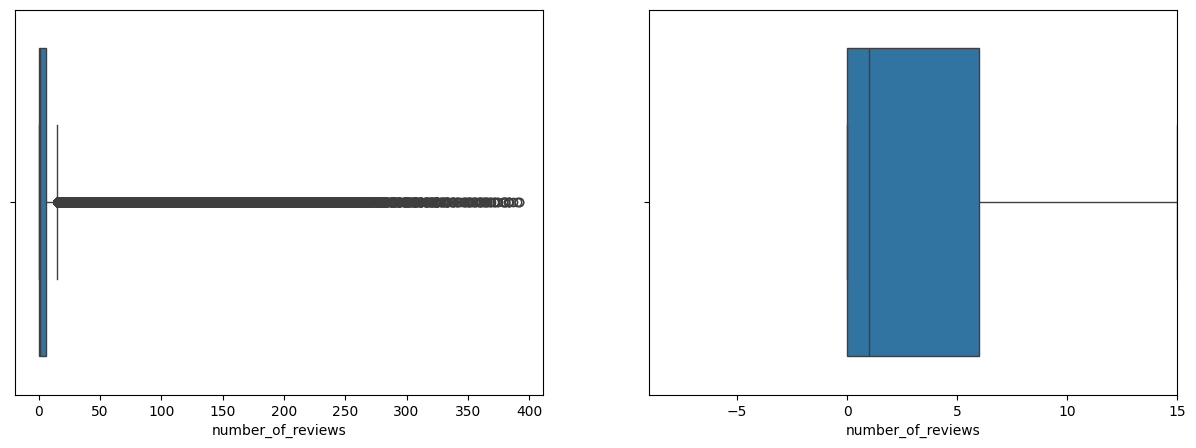

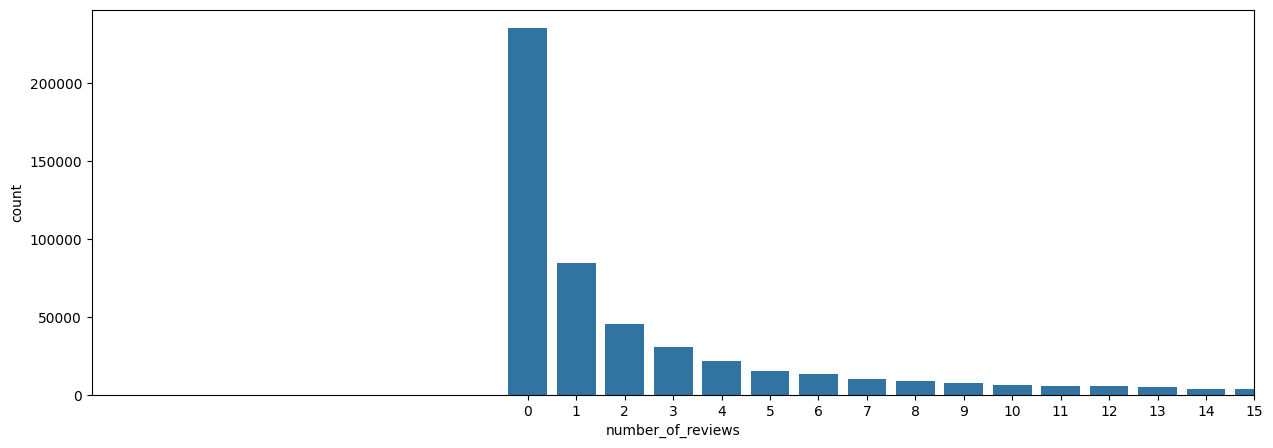

In [37]:
diagrama_caixa(base_airbnb['number_of_reviews'])
grafico_barra(base_airbnb['number_of_reviews'])

In [38]:
base_airbnb = base_airbnb.drop('number_of_reviews', axis=1)

In [39]:
base_airbnb.shape

(581983, 20)

TRATAMENTO DE COLUNAS COM VALORES DE TEXTO

property_type                
room_type                    
bed_type                     
amenities                    
cancellation_policy          


property_type  

In [40]:
print(base_airbnb['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('property_type', data=base_airbnb)
grafico.tick_params(axis='x', rotation=90)

property_type
Apartment                 458354
House                      51387
Condominium                26456
Serviced apartment         12671
Loft                       12352
Guest suite                 3621
Bed and breakfast           3472
Hostel                      2665
Guesthouse                  2155
Other                       1957
Villa                       1294
Townhouse                    969
Aparthotel                   693
Chalet                       481
Earth house                  468
Tiny house                   457
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       298
Cottage                      230
Bungalow                     207
Dorm                         185
Cabin                        141
Nature lodge                 124
Castle                        80
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                     

TypeError: countplot() got multiple values for argument 'data'

<Figure size 1500x500 with 0 Axes>

In [41]:
tabela_tipos_casa = base_airbnb['property_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 2000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['property_type'] == tipo, 'property_type'] = 'Outros'

print(base_airbnb['property_type'].value_counts())


['Other', 'Villa', 'Townhouse', 'Aparthotel', 'Chalet', 'Earth house', 'Tiny house', 'Boutique hotel', 'Hotel', 'Casa particular (Cuba)', 'Cottage', 'Bungalow', 'Dorm', 'Cabin', 'Nature lodge', 'Castle', 'Treehouse', 'Island', 'Boat', 'Hut', 'Campsite', 'Resort', 'Camper/RV', 'Yurt', 'Tent', 'Tipi', 'Barn', 'Farm stay', 'Pension (South Korea)', 'Dome house', 'Igloo', 'In-law', 'Vacation home', 'Timeshare', 'Pousada', 'Houseboat', 'Casa particular', 'Plane']
property_type
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Outros                  8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: count, dtype: int64


room_type  

room_type
Entire home/apt    372443
Private room       196859
Shared room         11714
Hotel room            967
Name: count, dtype: int64


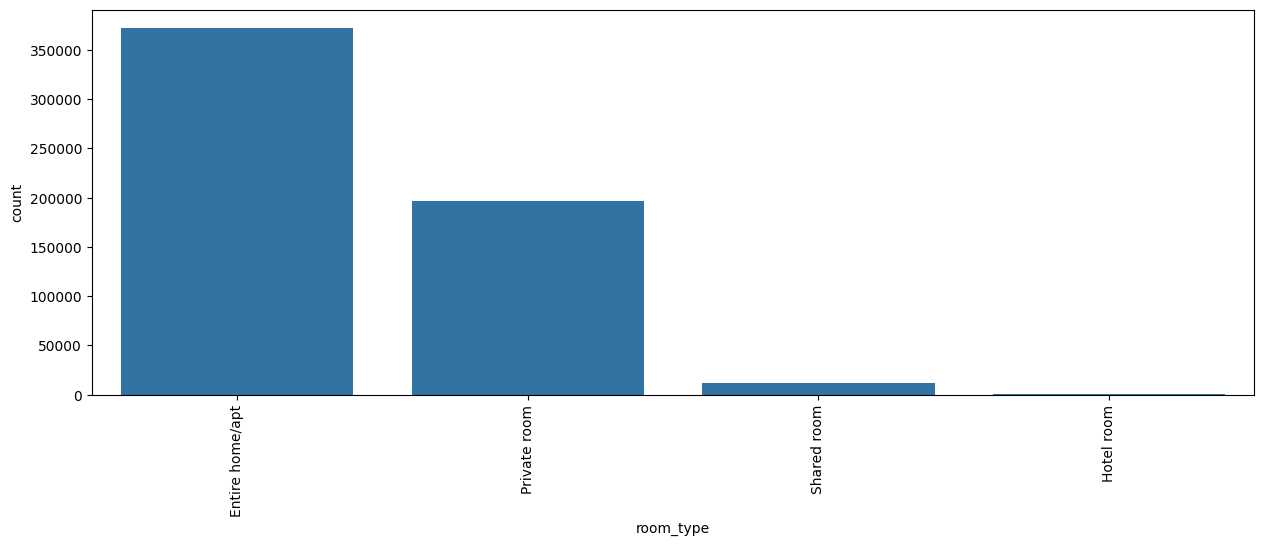

In [42]:
print(base_airbnb['room_type'].value_counts())

# Criar o gráfico
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='room_type', data=base_airbnb)  # Especifique 'x=' antes da coluna
grafico.tick_params(axis='x', rotation=90)
plt.show()

bed_type

bed_type
Real Bed         570643
Pull-out Sofa      8055
Futon              1634
Airbed             1155
Couch               496
Name: count, dtype: int64


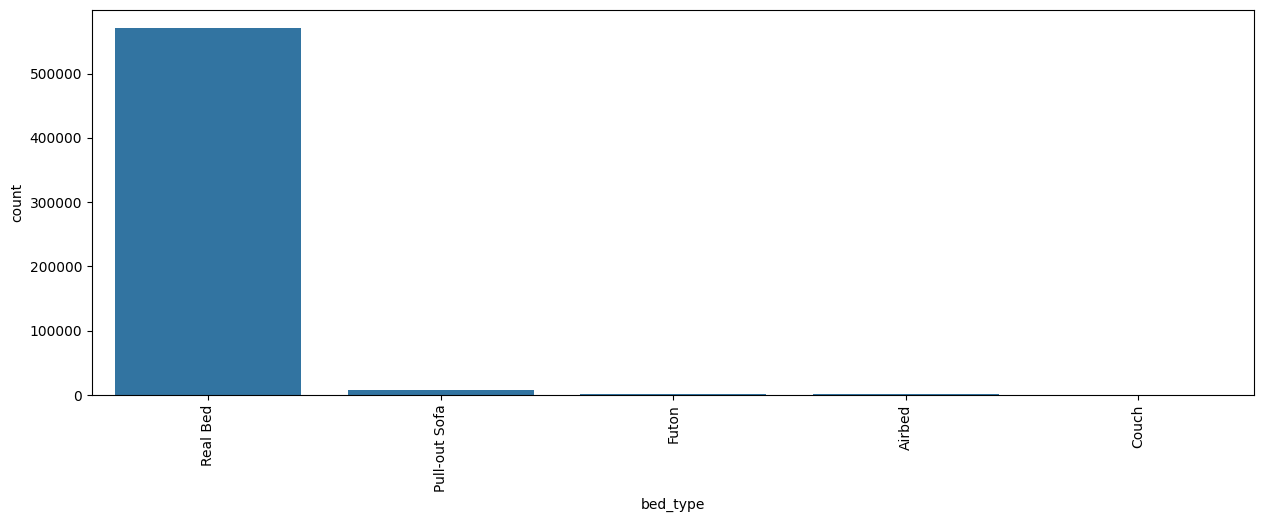

['Pull-out Sofa', 'Futon', 'Airbed', 'Couch']
bed_type
Real Bed    570643
Outros       11340
Name: count, dtype: int64


In [43]:
print(base_airbnb['bed_type'].value_counts())

# Criar o gráfico
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='bed_type', data=base_airbnb)  # Especifique 'x=' antes da coluna
grafico.tick_params(axis='x', rotation=90)
plt.show()

tabela_bed_type = base_airbnb['bed_type'].value_counts()
colunas_agrupar = []

for tipo in tabela_bed_type.index:
    if tabela_bed_type[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['bed_type'] == tipo, 'bed_type'] = 'Outros'

print(base_airbnb['bed_type'].value_counts())

cancellation_policy 

In [44]:
print(base_airbnb['cancellation_policy'].value_counts())

# Criar o gráfico
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)  # Especifique 'x=' antes da coluna
grafico.tick_params(axis='x', rotation=90)
plt.show()

cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9696
super_strict_60                   135
super_strict_30                    32
Name: count, dtype: int64


['strict', 'super_strict_60', 'super_strict_30']
cancellation_policy
flexible                       258096
strict_14_with_grace_period    200743
moderate                       113281
strict                           9863
Name: count, dtype: int64


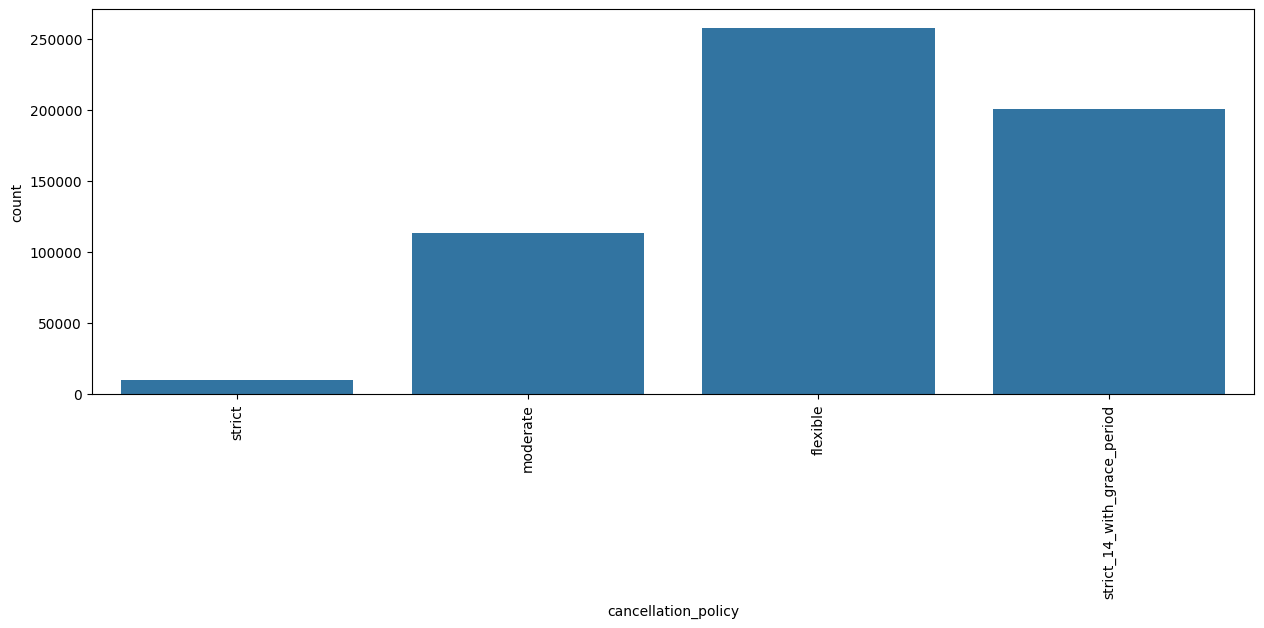

In [45]:
#AGRUPAR
tabela_cancellation_policy = base_airbnb['cancellation_policy'].value_counts()
colunas_agrupar = []

for tipo in tabela_cancellation_policy.index:
    if tabela_cancellation_policy[tipo] < 10000:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb.loc[base_airbnb['cancellation_policy'] == tipo, 'cancellation_policy'] = 'strict'

print(base_airbnb['cancellation_policy'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='cancellation_policy', data=base_airbnb)  # Especifique 'x=' antes da coluna
grafico.tick_params(axis='x', rotation=90)
plt.show()

amenities

In [47]:
print(base_airbnb['amenities'].iloc[0].split(','))
print(len(base_airbnb['amenities'].iloc[0].split(',')))
#CRIAR NOVA COLUNA COM BASE NO NUMERO DE AMENITIES
base_airbnb['n_amenitites'] = base_airbnb['amenities'].str.split(',').apply(len) #USAR STR PARA USAR FUNÇÃO TEXTO


['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
25


In [48]:
base_airbnb = base_airbnb.drop('n_amenitites', axis=1)

In [51]:
diagrama_caixa(base_airbnb['n_amenitites'])
grafico_barra(base_airbnb['n_amenitites'])

In [52]:
base_airbnb, linhas_removidas = excluir_outliers(base_airbnb, 'n_amenitites')
print('{} linhas removidas'.format(linhas_removidas))

24343 linhas removidas


VISUALIZAÇÃO DE MAPA DAS PROPRIEDADES

In [53]:
amostra = base_airbnb.sample(n=50000)
centro_mapa = {'lat':amostra.latitude.mean(), 'lon': amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5,
                        center=centro_mapa, zoom=10, mapbox_style='open-street-map')
mapa.show()

Encoding

- Ajustar as features para ajudar o modelo de machine learning que aprende com numeros (categoria, true/false)
- Features True/false -> True = 1 e False = 2
- Features de categoria (colunas de texto) utilizar metodo encoding de variaveis dummies

In [54]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
base_airbnb_cod = base_airbnb.copy()
for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 't', coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna] == 'f', coluna] = 0
print(base_airbnb_cod.iloc[0])

host_is_superhost                         1
host_listings_count                     2.0
latitude                         -22.965919
longitude                        -43.178962
property_type                   Condominium
room_type                   Entire home/apt
accommodates                              5
bathrooms                               1.0
bedrooms                                2.0
beds                                    2.0
bed_type                           Real Bed
price                                 270.0
extra_people                           51.0
minimum_nights                            4
instant_bookable                          1
is_business_travel_ready                  0
cancellation_policy                  strict
ano                                    2018
mes                                       4
n_amenitites                             25
n_amenities                              25
Name: 1, dtype: object


In [55]:
colunas_categoria = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod, columns=colunas_categoria)
display(base_airbnb_cod.head())

host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   
6                 1                  1.0 -22.981269 -43.190457             2   

   bathrooms  bedrooms  beds  price  extra_people  ...  \
1        1.0       2.0   2.0  270.0          51.0  ...   
3        1.0       1.0   2.0  161.0          45.0  ...   
4        1.0       1.0   2.0  222.0          68.0  ...   
5        1.5       1.0   2.0  308.0          86.0  ...   
6        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                       True                False                  False   
3                       True                False                  False   
4                       True                False                  False   
5                       True                False                  False   
6                       True                False                  False   

   room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
1                  False            False               True   
3                  False            False               True   
4                  False            False               True   
5                  False            False               True   
6                  False            False               True   

   cancellation_policy_flexible  cancellation_policy_moderate  \
1                         False                         False   
3                         False                         False   
4                         False                         False   
5                         False                         False   
6                         False                         False   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
1                        True                                            False  
3                        True                                            False  
4                        True                                            False  
5                        True                                            False  
6                        True                                            False  

[5 rows x 37 columns]

MODELO DE PREVISÃO

In [56]:
#Modelo de previsão
def avaliar_modelo(nome_modelo,y_teste,previsao):
    r2 = r2_score(y_teste,previsao)
    rsme = np.sqrt(mean_squared_error(y_teste,previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2:.2%}\nRSME:{rsme:.2f}'

Escolha dos modelos a serem testados: Random Forest, Linear Regression, Extra Tree

In [57]:
#Escolha dos modelos a serem testados:Random Forest, Linear Regression, Extra Tree
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()
modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
        }
y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

Separar os dados em treino e teste e treino do modelo

In [58]:
#Separar os dados em treino e teste e treino do modelo
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=10) #Mesma divisão aleatoria

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train,y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo,y_test,previsao))

Modelo RandomForest:
R²:97.25%
RSME:43.97
Modelo LinearRegression:
R²:32.70%
RSME:217.54
Modelo ExtraTrees:
R²:97.51%
RSME:41.80


In [ ]:
for nome_modelo, modelo in modelos.items():
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo,y_test,previsao))

Melhor modelo: ExtraTrees
Ajustes e melhorias no modelo

In [59]:
#Ajustes e melhorias no modelo
print(modelo_et.feature_importances_)
print(X_train.columns)

[0.01318704 0.03798499 0.09523573 0.09261162 0.06944627 0.06879751
 0.10842982 0.05069809 0.0859438  0.06374028 0.02168766 0.
 0.01058984 0.00452994 0.05884198 0.05938517 0.01247936 0.0013063
 0.0050965  0.00067285 0.00091809 0.00066195 0.00703972 0.00212644
 0.0023307  0.00222674 0.07327684 0.00032892 0.00311216 0.00189409
 0.0026686  0.00263088 0.01910483 0.01225061 0.00082935 0.00793532]
Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'extra_people',
       'minimum_nights', 'instant_bookable', 'is_business_travel_ready', 'ano',
       'mes', 'n_amenitites', 'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire hom

0
bedrooms                                         0.108430
latitude                                         0.095236
longitude                                        0.092612
extra_people                                     0.085944
room_type_Entire home/apt                        0.073277
accommodates                                     0.069446
bathrooms                                        0.068798
minimum_nights                                   0.063740
n_amenities                                      0.059385
n_amenitites                                     0.058842
beds                                             0.050698
host_listings_count                              0.037985
instant_bookable                                 0.021688
cancellation_policy_flexible                     0.019105
host_is_superhost                                0.013187
property_type_Apartment                          0.012479
cancellation_policy_moderate                     0.012251
ano                                              0.010590
cancellation_policy_strict_14_with_grace_period  0.007935
property_type_House                              0.007040
property_type_Condominium                        0.005097
mes                                              0.004530
room_type_Private room                           0.003112
bed_type_Outros                                  0.002669
bed_type_Real Bed                                0.002631
property_type_Outros                             0.002331
property_type_Serviced apartment                 0.002227
property_type_Loft                               0.002126
room_type_Shared room                            0.001894
property_type_Bed and breakfast                  0.001306
property_type_Guesthouse                         0.000918
cancellation_policy_strict                       0.000829
property_type_Guest suite                        0.000673
property_type_Hostel                             0.000662
room_type_Hotel room                             0.000329
is_business_travel_ready                         0.000000

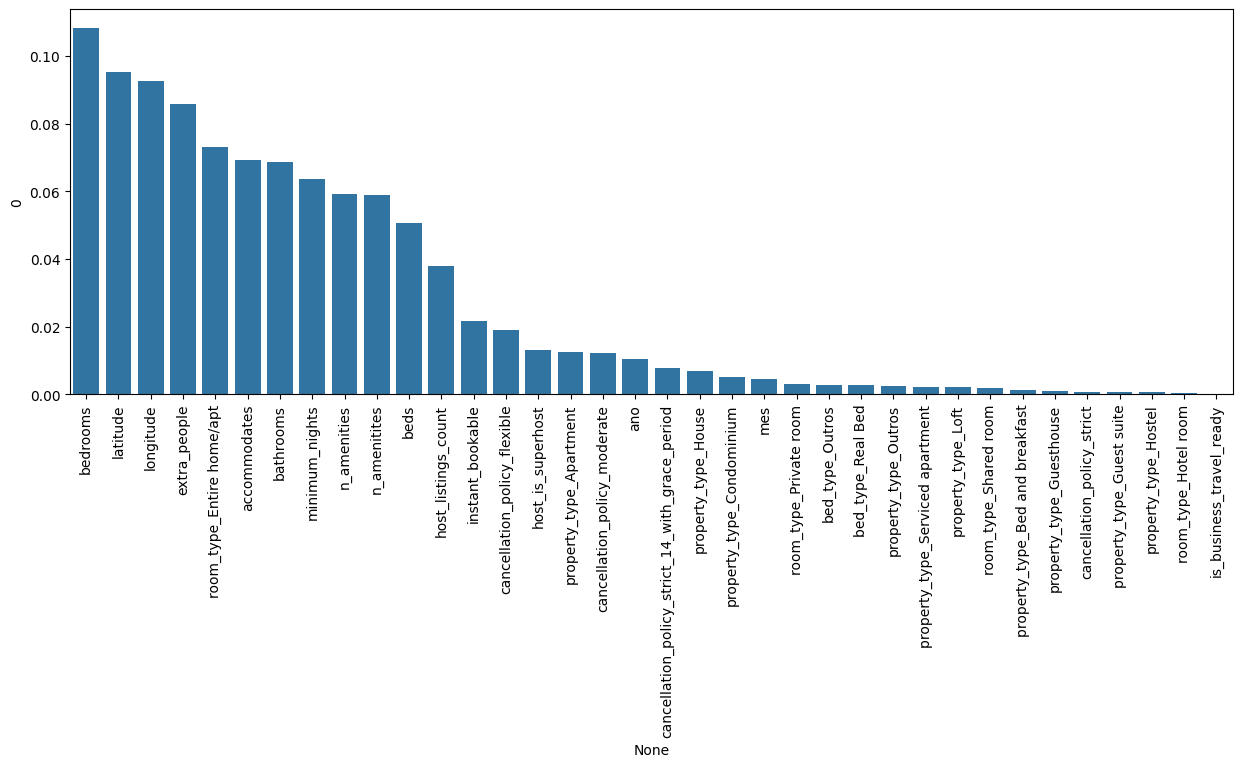

In [60]:
importance_features = pd.DataFrame(modelo_et.feature_importances_,X_train.columns)
importance_features = importance_features.sort_values(by=0, ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importance_features.index,y=importance_features[0])
ax.tick_params(axis='x', rotation=90)
display(importance_features)

Ajustes finais no modelo -> excluir is_business_travel_ready

In [ ]:
#Ajustes finais no modelo -> excluir is_business_travel_ready

In [61]:
base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready',axis=1)
y = base_airbnb_cod['price']
x = base_airbnb_cod.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=10) #Mesma divisão aleatoria

modelo_et.fit(X_train,y_train)
#testar
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTrees',y_test,previsao))


Modelo ExtraTrees:
R²:97.53%
RSME:41.66


In [62]:
base_teste = base_airbnb_cod.copy()
for coluna in base_teste:
    if 'bed_type' in coluna:
        base_teste = base_teste.drop(coluna, axis=1)

DEPLOY DO MODELO
Passo 1 -> Criar arquivo do modelo (joblib)
Passo 2 -> Escolher a forma de deploy
Passo 3 -> Outro arquivo python
Passo 4 -> Importar streamlit e criar código
Passo 5 -> Atribuir ao botão o carregamento do modelo
Passo 6 -> Deploy feito

In [63]:
x['price'] = y
x.to_csv('dados.csv')

In [64]:
import joblib
joblib.dump(modelo_et, 'modelo.joblib')

['modelo.joblib']